In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shapereader
import cartopy.feature as cfeature # to add coastlines, land and ocean
from pathlib import Path

In [20]:
data_path = Path("D:/Folder_2023/laban/")

In [21]:
drr = np.genfromtxt(data_path / "Ibrahim.csv", delimiter=",", skip_header=1)

#stn = drr[:, 0]
lat = drr[:, 0]
lon = drr[:, 1]
rr = drr[:, 2]

In [22]:
lat

array([ 37.25,  36.75,  36.75, ..., -34.25, -34.25, -34.75])

In [23]:
shp_path = data_path / "Africa/Africa.shp"
adm1_shapes = list(shapereader.Reader(str(shp_path)).geometries()) 
#adm1_shapes

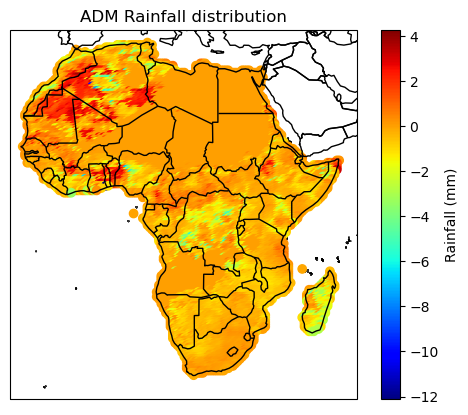

In [31]:
fig = plt.figure()
#splot = ax.scatter(lon,lat,c=rr, cmap=cm.jet, alpha=1)
# create axes with specific proojection
ax = plt.axes(projection=ccrs.PlateCarree())
# set the domain lat lon extent
ax.set_extent([-20, 55, -40, 40], crs=ccrs.PlateCarree())

# add the administrative borders from the shapefile
ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black',facecolor='none', alpha=0.8)
# and add country borders, ocean, land and lake borders from cartopy's set of features
ax.add_feature(cf.BORDERS)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')
splot = ax.scatter(lon,lat,c=rr, cmap=cm.jet, alpha=1)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.set(title='ADM Rainfall distribution')
fig.colorbar(splot,label="Rainfall (mm)", orientation="vertical")

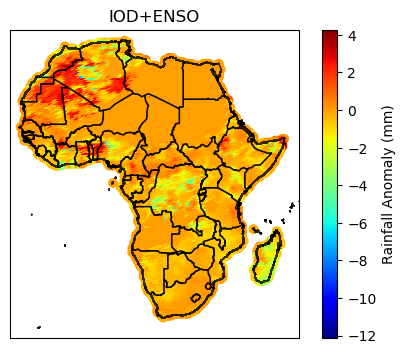

In [51]:
# read data

TA_rr = np.genfromtxt(
    data_path / "Ibrahim.csv", delimiter=",", skip_header=1
)
latt = TA_rr[:, 0:1]
lont = TA_rr[:, 1:2]
rrt = TA_rr[:, 2:3]

fig = plt.figure(figsize=(6, 4))
# set the cartopy projection
ax = fig.add_subplot(projection=ccrs.PlateCarree())
# set the domain based on the lon lat
ax.set_extent([-20, 55, -40, 40], ccrs.PlateCarree())
r = ax.scatter(x=lont, y=latt,c=rrt,cmap="jet")
# this add the countries borders and shapefile
ax.add_geometries(
    adm1_shapes, ccrs.PlateCarree(), edgecolor="black", facecolor="none", alpha=0.8
)
#ax.add_feature(cf.BORDERS)
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND, edgecolor="black")
#ax.add_feature(cf.LAKES, edgecolor="black")

ax.set(title="IOD+ENSO")
plt.colorbar(r, label="Rainfall Anomaly (mm)", orientation="vertical")
#plt.savefig("C:/JRA55_temp/Frank_SST_ENSO/EL_NINO+PIOD1.png")
#print(rr)